# Networks Workshop

First we're going to use networkx to understand how we can generate, visualise and understand networks   

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

First we're going to create a Barabasi Albert Graph. This network that grows over time where new nodes preferentially attach to already well-connected nodes, leading to hubs and a scale-free (power-law) degree distribution. Explore changing around the values of $n$ and $m$ and see how that changes the resulting network.

In [17]:

n = 50   # number of nodes (start small!)
m = 2    # each new node attaches to m existing nodes

G_ba = nx.barabasi_albert_graph(n, m, seed=42)

print("BA graph: nodes =", G_ba.number_of_nodes(), "edges =", G_ba.number_of_edges())

BA graph: nodes = 50 edges = 96


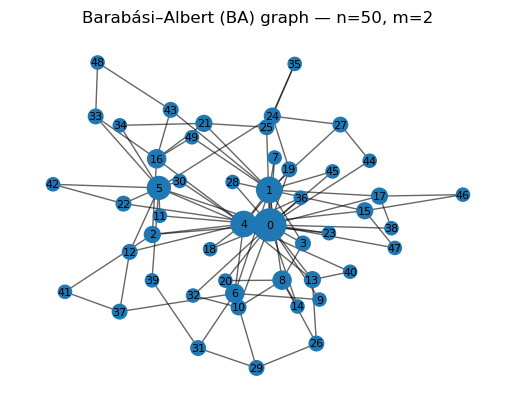

In [18]:
# Force-directed layout
pos = nx.spring_layout(G_ba, seed=42)

# Draw nodes sized by degree so bigger-degree nodes are larger
degrees = dict(G_ba.degree())
node_sizes = [50 + 20 * degrees[n] for n in G_ba.nodes()]  # base size 50, plus 20 per degree

# Draw
plt.figure()
nx.draw_networkx_nodes(G_ba, pos, node_size=node_sizes)
nx.draw_networkx_edges(G_ba, pos, alpha=0.6)
nx.draw_networkx_labels(G_ba, pos, font_size=8)   # labels help beginners see node IDs
plt.title("Barabási–Albert (BA) graph — n=50, m=2")
plt.axis("off")
plt.show()


We're also going to look at a Watts-Strogatz graph. This network starts as a regular ring (each node connected to its nearest neighbors) and then randomly rewires a small fraction of edges, creating high clustering and short path lengths. Explore changing around the values of $n$, $k$ and $p$ and see how that changes the resulting network.

In [19]:
# WS: start from a ring where each node connects to k neighbors, then rewire with prob p
n = 50
k = 4       # each node initially connected to k nearest neighbors in ring
p = 0.1     # rewiring probability (small p keeps rings with shortcuts)

G_ws = nx.watts_strogatz_graph(n, k, p, seed=42)

print("WS graph: nodes =", G_ws.number_of_nodes(), "edges =", G_ws.number_of_edges())


WS graph: nodes = 50 edges = 100


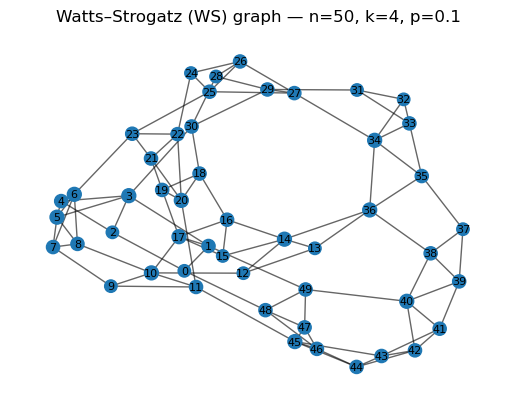

In [20]:
# Draw WS 
pos_ws = nx.spring_layout(G_ws, seed=42)

degrees_ws = dict(G_ws.degree())
sizes_ws = [50 + 10 * degrees_ws[n] for n in G_ws.nodes()]

plt.figure()
nx.draw_networkx_nodes(G_ws, pos_ws, node_size=sizes_ws)
nx.draw_networkx_edges(G_ws, pos_ws, alpha=0.6)
nx.draw_networkx_labels(G_ws, pos_ws, font_size=8)
plt.title("Watts–Strogatz (WS) graph — n=50, k=4, p=0.1")
plt.axis("off")
plt.show()


## Degree distribution

The **degree** of a node is the number of connections (edges) it has.

The **degree distribution** tells us how many nodes have degree 1, degree 2, degree 3, and so on.

Before computing anything, look at the plots of the networks and think:

- Do most nodes seem to have a similar number of connections?
- Are there a few very highly connected nodes (hubs)?
- Would you expect the degree distribution to be fairly flat, or very uneven?

Make a prediction for:
- the Barabási–Albert graph
- the Watts–Strogatz graph


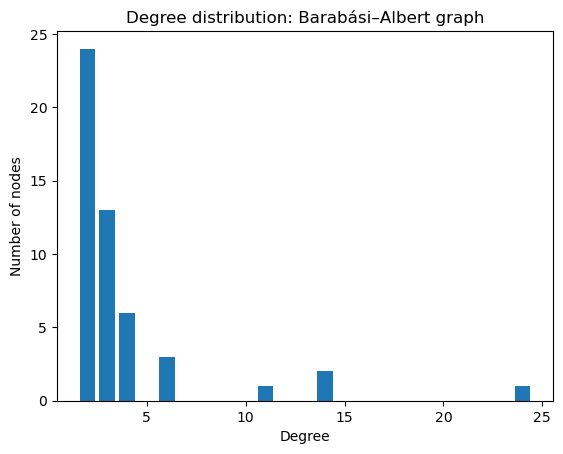

In [21]:
from collections import Counter

# Barabási–Albert
degrees_ba = [d for _, d in G_ba.degree()]
degree_counts_ba = Counter(degrees_ba)

plt.figure()
plt.bar(degree_counts_ba.keys(), degree_counts_ba.values())
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree distribution: Barabási–Albert graph")
plt.show()


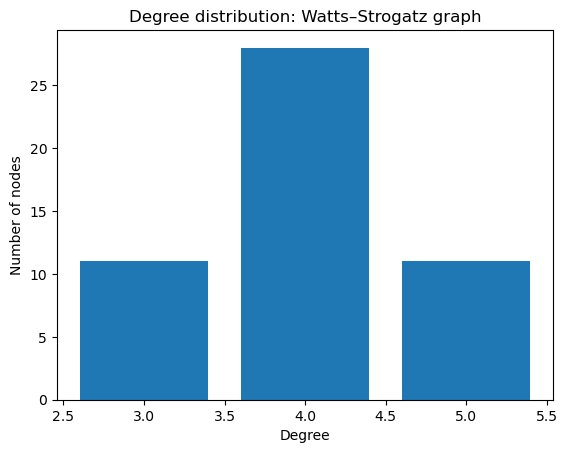

In [22]:
# Watts–Strogatz
degrees_ws = [d for _, d in G_ws.degree()]
degree_counts_ws = Counter(degrees_ws)

plt.figure()
plt.bar(degree_counts_ws.keys(), degree_counts_ws.values())
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree distribution: Watts–Strogatz graph")
plt.show()


## Clustering coefficient

The **clustering coefficient** measures how connected a node’s neighbours are to each other.

- A clustering coefficient of **1** means all neighbours of a node are connected.
- A clustering coefficient of **0** means none of the neighbours are connected.

We can compute:
- a **local clustering coefficient** (for each node)
- an **average clustering coefficient** (for the whole network)

Before computing anything, look at the network plots and predict:

- Which network do you expect to have higher clustering?
- Why?


In [23]:
# Average clustering coefficient
clustering_ba = nx.average_clustering(G_ba)
clustering_ws = nx.average_clustering(G_ws)

print("Average clustering (BA):", clustering_ba)
print("Average clustering (WS):", clustering_ws)


Average clustering (BA): 0.2608806121414817
Average clustering (WS): 0.34333333333333343


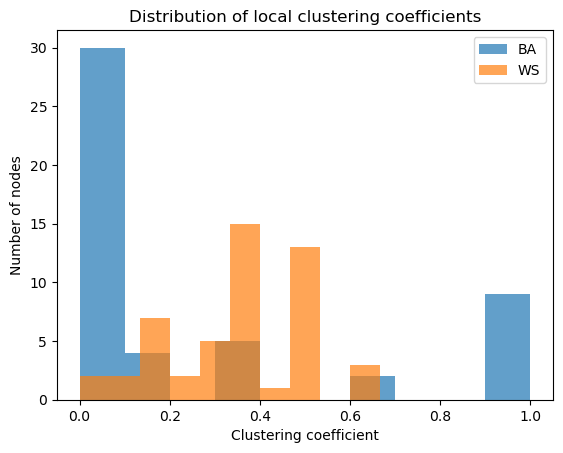

In [24]:
# Local clustering coefficients for each node
local_clustering_ba = list(nx.clustering(G_ba).values())
local_clustering_ws = list(nx.clustering(G_ws).values())

plt.figure()
plt.hist(local_clustering_ba, bins=10, alpha=0.7, label="BA")
plt.hist(local_clustering_ws, bins=10, alpha=0.7, label="WS")
plt.xlabel("Clustering coefficient")
plt.ylabel("Number of nodes")
plt.title("Distribution of local clustering coefficients")
plt.legend()
plt.show()


## Average shortest path length

The **shortest path length** between two nodes is the smallest number of edges needed
to travel from one node to the other.

The **average shortest path length** is the average of this value over all pairs of nodes
in the network.

Before computing anything, look at the network plots and think:

- Which network seems easier to navigate?
- Which one should allow you to get from one node to another in fewer steps?
- How might hubs or long-range connections affect this?

Make a prediction for:
- the Barabási–Albert graph
- the Watts–Strogatz graph


Note: The average shortest path length is only defined for **connected** networks.
If a network is not connected, we compute this value on the **largest connected component**.

In [10]:
print("BA connected?", nx.is_connected(G_ba))
print("WS connected?", nx.is_connected(G_ws))

BA connected? True
WS connected? True


In [11]:
# Average shortest path length
asp_ba = nx.average_shortest_path_length(G_ba)
asp_ws = nx.average_shortest_path_length(G_ws)

print("Average shortest path length (BA):", asp_ba)
print("Average shortest path length (WS):", asp_ws)


Average shortest path length (BA): 2.498775510204082
Average shortest path length (WS): 3.6408163265306124


## Diameter

The **diameter** of a network is the **length of the longest shortest path** between any two nodes.

In other words:
- For every pair of nodes, we find the shortest path between them.
- The diameter is the **largest** of those shortest path lengths.

So the diameter tells us:
- how far apart the two most distant nodes in the network are
- how “wide” the network is, in terms of paths

Before running the code, look at the network plot and think:

- Which two nodes might be the hardest to reach from one another?
- Would you expect this network to h


Diameter: 7
Diameter path: [7, 6, 23, 25, 27]


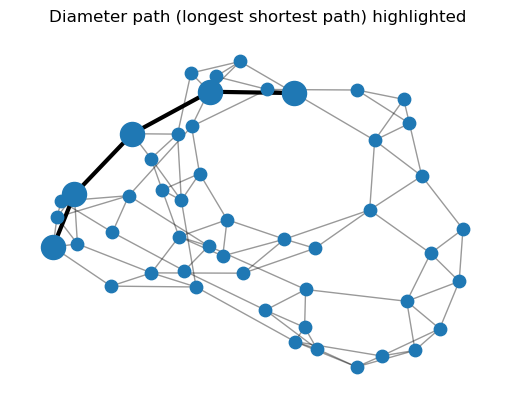

In [12]:
# Visualising the diameter (longest shortest path) on a graph

# Choose which graph to visualise (change G_ba to G_ws)
G = G_ws   # or G_ba

# Compute the diameter of the graph
diameter = nx.diameter(G)

# Find two nodes that are a diameter apart
periphery_nodes = nx.periphery(G)
u = periphery_nodes[0]
v = periphery_nodes[1]

# Compute the shortest path between these two nodes
diameter_path = nx.shortest_path(G, u, v)

print("Diameter:", diameter)
print("Diameter path:", diameter_path)

# Layout for drawing
pos = nx.spring_layout(G, seed=42)

plt.figure()

# Draw all nodes and edges (light)
nx.draw_networkx_nodes(G, pos, node_size=80)
nx.draw_networkx_edges(G, pos, alpha=0.4)

# Highlight the diameter path
nx.draw_networkx_nodes(G, pos, nodelist=diameter_path, node_size=300)
path_edges = list(zip(diameter_path, diameter_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3)

plt.title("Diameter path (longest shortest path) highlighted")
plt.axis("off")
plt.show()


## Centrality

**Centrality** measures how important a node is in a network.

The simplest form is **degree (or regular) centrality**, which is based only on how
many connections a node has. This captures popularity, but not how a node connects
different parts of the network.

# Betweenness centrality

**Betweenness centrality** measures how often a node lies on the shortest paths
between other pairs of nodes.

A node has high betweenness if:
- many shortest paths pass through it
- it acts as a **bridge** between different parts of the network

Importantly:
- a node can have high betweenness even if it does **not** have many connections
- betweenness captures *control of flow*, not popularity

Before running the code, look at the network and think:

- Which nodes seem to sit between clusters or regions?
- Which nodes might be important for connecting distant parts of the network?


Top 5 nodes by betweenness (node, score):
36 0.1475
11 0.1411
1 0.1327
3 0.1275
30 0.1264


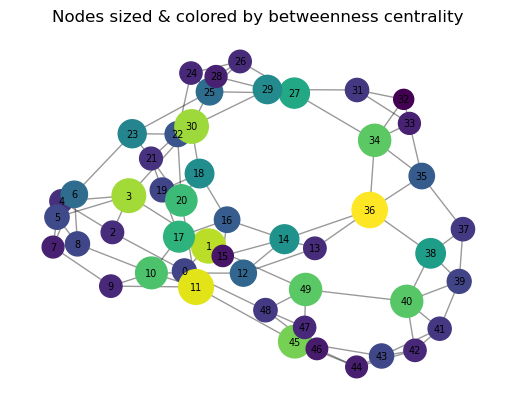

In [13]:
# Betweenness centrality: compute and visualise 

# Choose graph to visualise
G = G_ws   # or G_ba

# If disconnected, use the largest connected component for path-based metrics
if nx.is_connected(G):
    G_use = G
else:
    largest = max(nx.connected_components(G), key=len)
    G_use = G.subgraph(largest).copy()

# Compute betweenness centrality (returns dict node -> score)
bet = nx.betweenness_centrality(G_use)

# Prepare sizes and colors for plotting
# scale node sizes so differences are visible for small graphs
bet_values = [bet[n] for n in G_use.nodes()]
node_sizes = [200 + 3000 * v for v in bet_values]   # base size 200, scale by centrality
node_colors = bet_values                              # colormap maps these values

# Print top 5 nodes by betweenness
top5 = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by betweenness (node, score):")
for node, score in top5:
    print(node, round(score, 4))

# Layout and drawing
pos = nx.spring_layout(G_use, seed=42)

plt.figure()
nx.draw_networkx_nodes(G_use, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G_use, pos, alpha=0.4)
nx.draw_networkx_labels(G_use, pos, font_size=7)   # remove or set with_labels=False if labels clutter
plt.title("Nodes sized & colored by betweenness centrality")
plt.axis("off")
plt.show()


## Assortativity

**Assortativity** measures whether nodes tend to connect to other nodes that are
**similar** or **different**.

Here we look at **degree assortativity**, which asks:
- do high-degree nodes tend to connect to other high-degree nodes?
- or do high-degree nodes tend to connect to low-degree nodes?

The assortativity coefficient is:
- **positive** if similar-degree nodes connect to each other
- **negative** if high-degree nodes connect to low-degree nodes
- close to **zero** if there is no strong preference

Use the network visualisation below, where nodes are sized by degree, to help
interpret the assortativity value.


Degree assortativity coefficient: -0.052


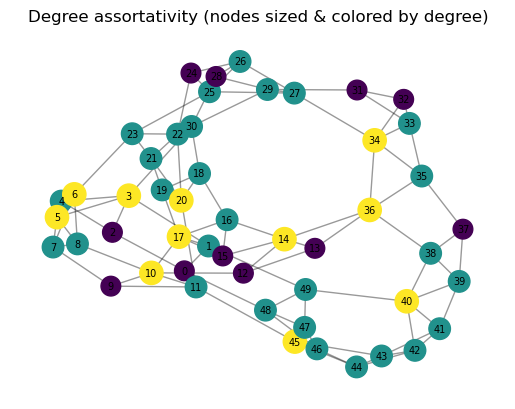

In [14]:
# Degree assortativity

# Choose graph
G = G_ws   # or G_ba

# Use largest connected component if needed
if nx.is_connected(G):
    G_use = G
else:
    largest = max(nx.connected_components(G), key=len)
    G_use = G.subgraph(largest).copy()

# Compute degree assortativity coefficient
r = nx.degree_assortativity_coefficient(G_use)
print("Degree assortativity coefficient:", round(r, 3))

# Prepare node sizes and colors based on degree
degrees = dict(G_use.degree())
node_sizes = [80 + 40 * degrees[n] for n in G_use.nodes()]
node_colors = [degrees[n] for n in G_use.nodes()]

# Draw the network
pos = nx.spring_layout(G_use, seed=42)

plt.figure()
nx.draw_networkx_nodes(
    G_use,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.viridis
)
nx.draw_networkx_edges(G_use, pos, alpha=0.4)
nx.draw_networkx_labels(G_use, pos, font_size=7)

plt.title("Degree assortativity (nodes sized & colored by degree)")
plt.axis("off")
plt.show()


Number of communities detected: 5


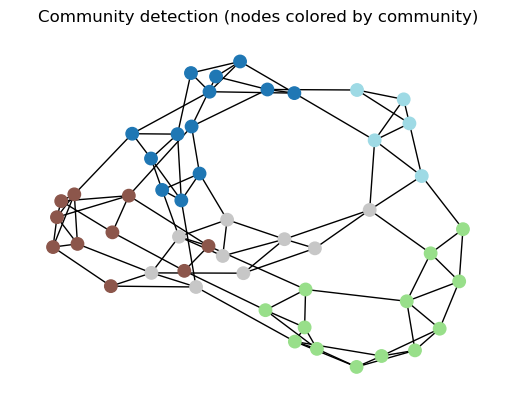

In [15]:
# Community detection and visualisation 

from networkx.algorithms.community import greedy_modularity_communities

# Choose graph
G = G_ws   # or G_ba

# Detect communities
communities = list(greedy_modularity_communities(G))

print("Number of communities detected:", len(communities))

# Assign a color to each community
node_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_community[node] = i

colors = [node_community[n] for n in G.nodes()]

# Draw
pos = nx.spring_layout(G, seed=42)
plt.figure()
nx.draw_networkx(
    G,
    pos,
    node_color=colors,
    cmap=plt.cm.tab20,
    node_size=80,
    with_labels=False
)
plt.title("Community detection (nodes colored by community)")
plt.axis("off")
plt.show()
